In [1]:
library("readxl")
library('TTR')
library("ggplot2")
library("usethis")
library("zoo")
library('ggcorrplot')
library("zoo")
library("dplyr")
library("ggplot2")
library("GGally")
library('forecast')
library('fpp')
library("data.table")

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'TTR' was built under R version 3.6.3"Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'fpp' was built under R version 3.6.3"Loading required package: fma
Warning message:


In [2]:
FullData=read.csv("C:/Users/gabri/Desktop/IE360/HW2/IE360_Spring22_HW2_data.csv")
Data=FullData[1:28,]
colnames(Data) <- c('Quarter','UGS','RNUV','NLPG','PU','PG','NUGV','NDGV','GNPA','GNPC','GNP')
Data$Quarter=as.Date(as.yearqtr(Data$Quarter, format = "%Y_Q%q"))
Data$UGS=as.numeric(gsub(" ","",as.character(Data$UGS),fixed=TRUE))
Data$RNUV=as.numeric(gsub(" ","",as.character(Data$RNUV),fixed=TRUE))
Data$NLPG=as.numeric(gsub(" ","",as.character(Data$NLPG),fixed=TRUE))
Data$NUGV=as.numeric(gsub(" ","",as.character(Data$NUGV),fixed=TRUE))
Data$GNPA=as.numeric(gsub(" ","",as.character(Data$GNPA),fixed=TRUE))
Data$GNPC=as.numeric(gsub(" ","",as.character(Data$GNPC),fixed=TRUE))
Data$GNP=as.numeric(gsub(" ","",as.character(Data$GNP),fixed=TRUE))
Data$Trend=seq(0,27,by=1)
Data$Quart=seq(1,4,by=1)
Data <- Data %>%
  mutate(UGSlag1=lag(UGS,1),
         UGSlag2=lag(UGS,2),
         UGSlag3=lag(UGS,3),
         UGSlag4=lag(UGS,4),
         UGSlag5=lag(UGS,5),
         UGSlag6=lag(UGS,6),
         UGSlag7=lag(UGS,7),
         UGSlag8=lag(UGS,8),
         RNUVlag1=lag(RNUV,1),
         NLPGlag1=lag(NLPG,1),
         NUGVlag1=lag(NUGV,1),
         NDGVlag1=lag(NDGV,1),
         GNPAlag1=lag(GNPA,1),
         GNPClag1=lag(GNPC,1),
         PGlag1=lag(PG,1),
         PUlag1=lag(PU,1),
         GNPlag1=lag(GNP,1))
Data$diffUGS=diff(c(0,Data$UGS))
Data$diffUGS[1]=0
Data$doublediffUGS=diff(c(0,Data$diffUGS))
Data$doublediffUGS[1]=0
Data[is.na(Data)] = 0

### In this homework, my aim is to predict next year's quarterly UGS demand by using the available data from 2000/01 to 2007/01. To achieve this, I used the first 28 rows of the data, which has no missing data. In order to improve my regression models, I added lagged versions of dependent and independent data

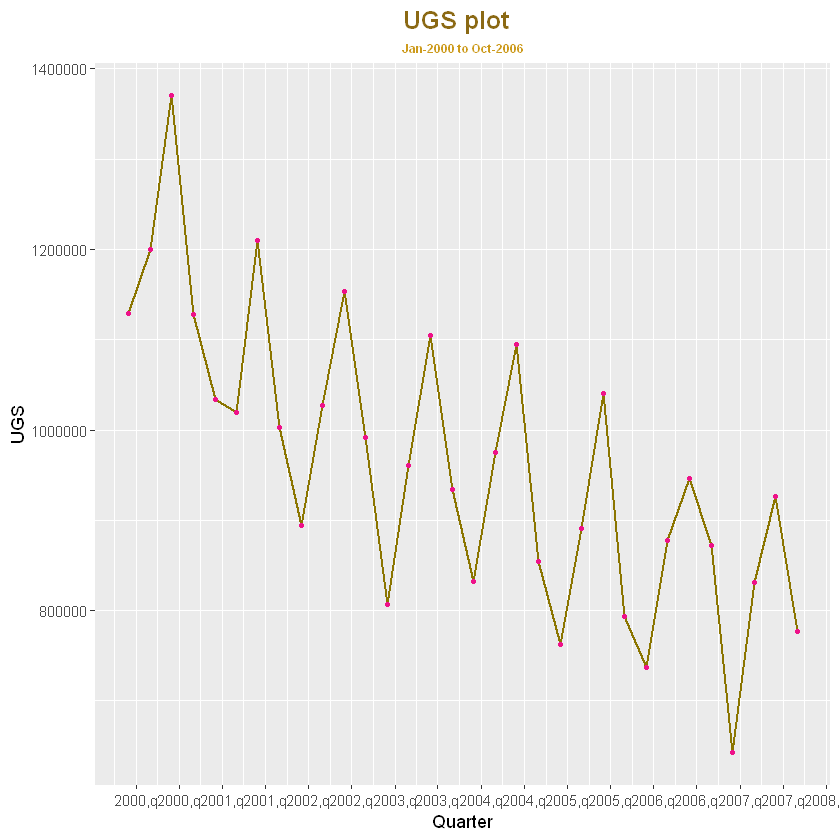

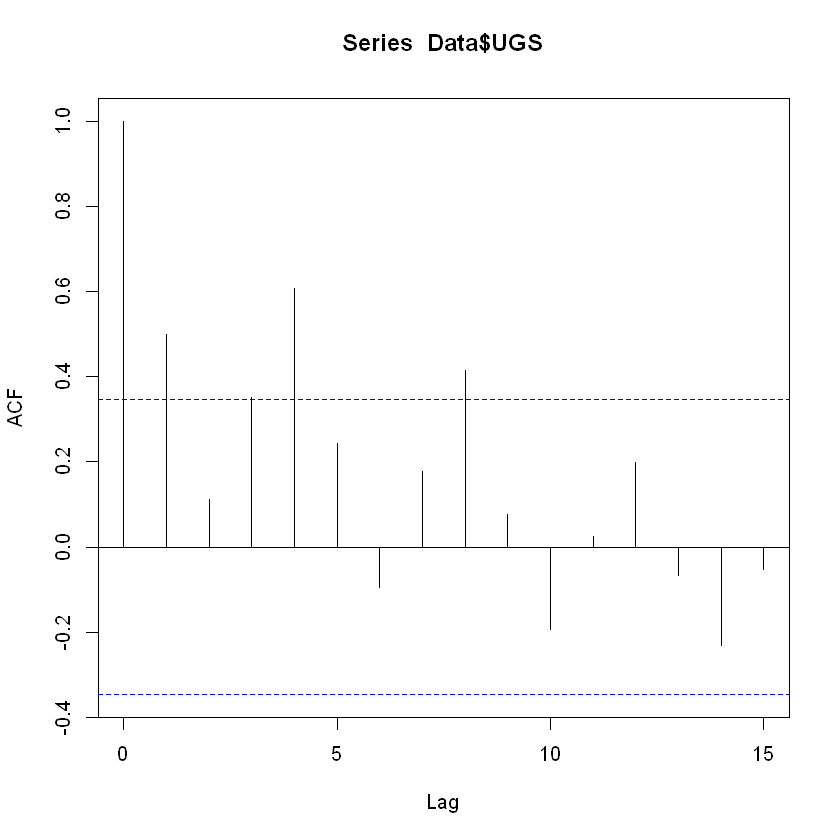

In [16]:
ggplot(data=Data,aes(x=Quarter,y=UGS))+geom_line(size=0.7,colour="gold4")+
  geom_point(colour="deeppink2",size=1)+
  labs(title = "UGS plot  ", x = "Quarter",y = "UGS",subtitle = "Jan-2000 to Oct-2006")+
  theme(plot.title = element_text(color = "goldenrod4", size = 15, face = "bold",hjust=0.5), 
  plot.subtitle = element_text(size = 7,color="goldenrod3", face = "bold", hjust = 0.5),
  plot.caption = element_text(hjust = 0))+scale_x_date(date_breaks = "6 month",date_labels="%Y,%q")
acf(Data$UGS)

### When UGS sales are examined, it can be clearly seen that it has almost constant variance with a decreasing mean. It looks like there is a seasonality with frequency 4. To have a better view, I transformed it to a time series data and decomposed it.

[1] TRUE

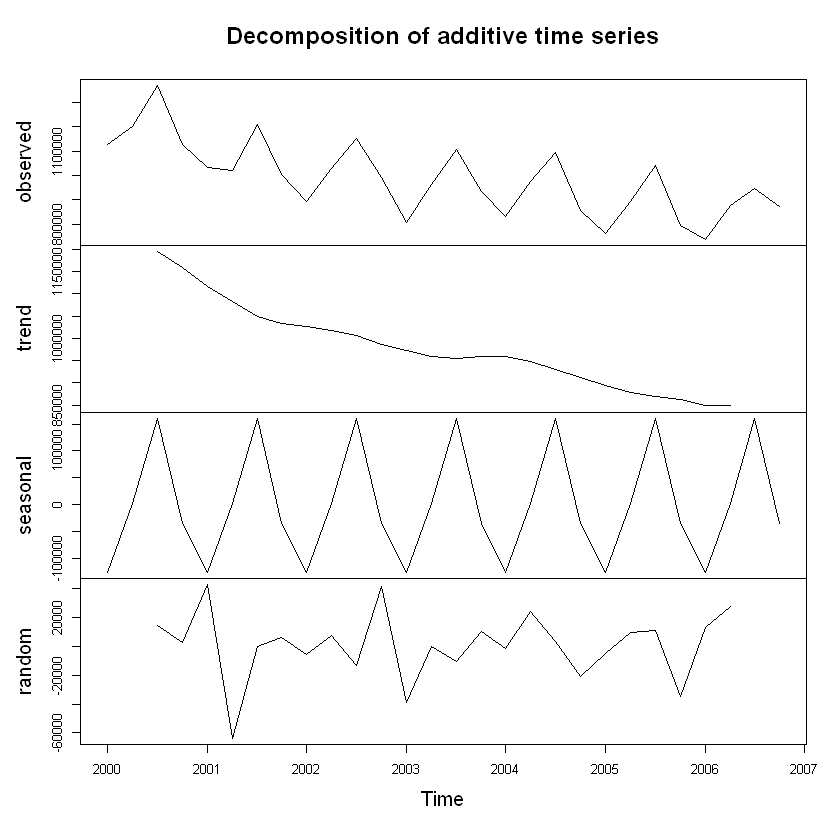

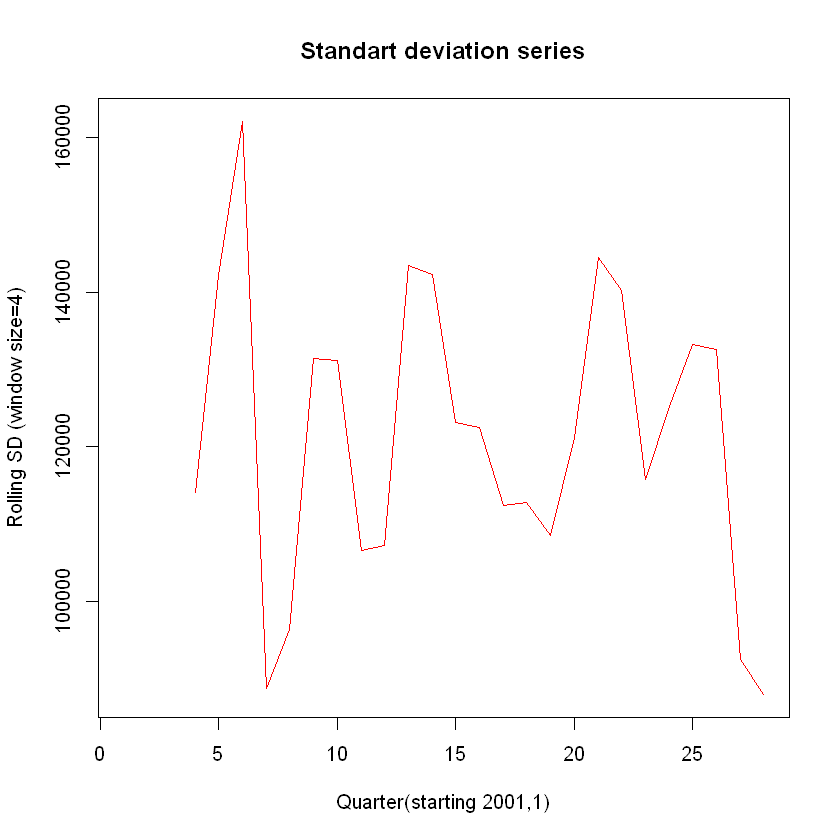

In [4]:
UGS=Data$UGS
UGSts <- ts(UGS, freq=4, start=c(2000,1))
is.ts(UGSts)
UGSdec<-decompose(UGSts,type="additive")
plot(UGSdec)
RollVar=runSD(Data$UGS,n=4)
plot(RollVar,type='l',col='red',xlab = "Quarter(starting 2001,1)",ylab = "Rolling SD (window size=4)",main = "Standart deviation series")

### Decomposition supports my thesis about mean and variance. Allthough rolling variance is changing (mainly due to the low number of data and wide), it doesn't display a clear pattern. Rolling mean is decreasing in a linear trend. Since variance is kind a constant over time, I won't do any transformation and use de UGS value itself

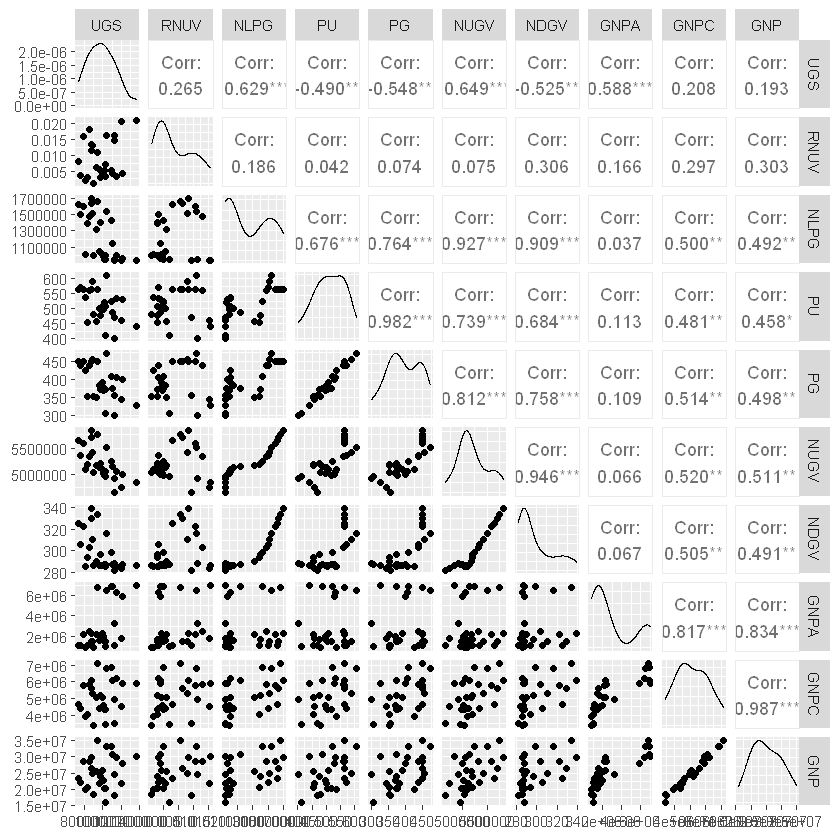

In [5]:
ggpairs(Data, columns = c(2:11))

### When I examined the correlation between my dependent and independent variables, I could see that UGS has high correlation with most of the dependent variables, so they can be added to regression model to improve model. However, independent variables have high correlation between themselves, so I expect that adding one or two dependent variable will be enough to improve model because of the fact that adding correlated independent variable doesn't increase model quality much. Since we have highly correlated dependent variables, I expect that a regression model will work better than a time series analysis model


Call:
lm(formula = UGS ~ +Trend + as.factor(Quart), data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-81167 -31283  -3458  28640  94502 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1046875      22947  45.621  < 2e-16 ***
Trend               -13497       1147 -11.764 3.28e-11 ***
as.factor(Quart)2   121532      25987   4.677 0.000104 ***
as.factor(Quart)3   273619      26063  10.498 3.03e-10 ***
as.factor(Quart)4    95049      26189   3.629 0.001405 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48570 on 23 degrees of freedom
Multiple R-squared:  0.9119,	Adjusted R-squared:  0.8966 
F-statistic: 59.53 on 4 and 23 DF,  p-value: 8.446e-12



	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals
LM test = 11.462, df = 8, p-value = 0.1769


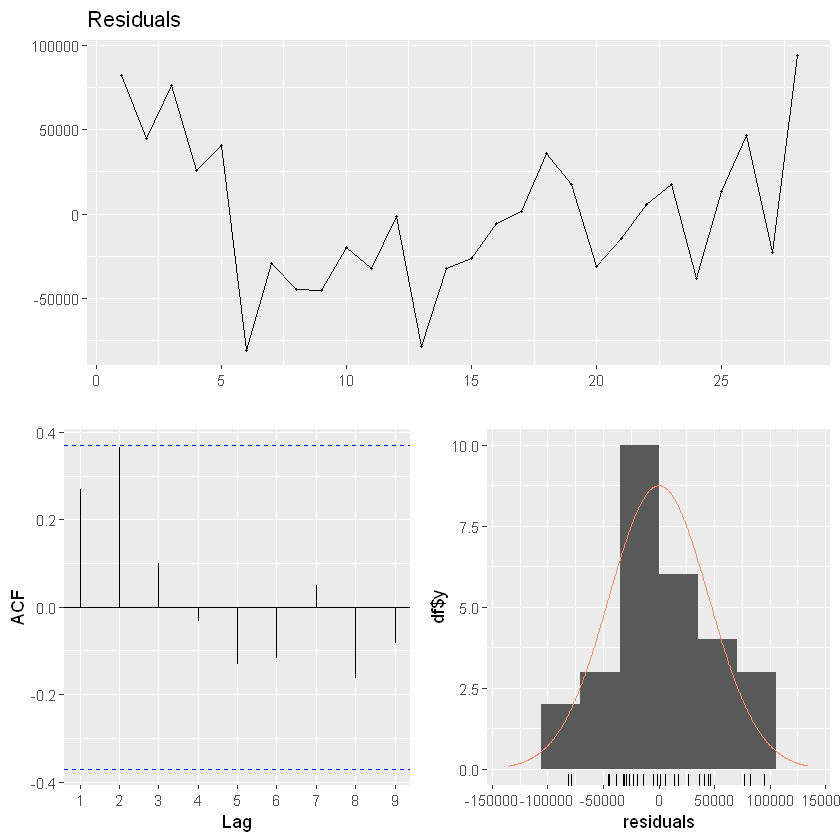

In [6]:
model1 <- lm(UGS~+Trend+as.factor(Quart), Data)
summary(model1)
checkresiduals(model1)

### In my first model, I added linear trend and seasonality variables. Residuals exhibit a patterns, so future investigation is needed


Call:
lm(formula = UGS ~ Trend + as.factor(Quart) + NLPG + PU + PG + 
    NUGV + NDGV + GNPA, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-67794 -10461   1987  18461  32208 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.109e+06  8.406e+05   3.699  0.00178 ** 
Trend              1.514e+04  1.284e+04   1.178  0.25486    
as.factor(Quart)2  1.463e+05  2.356e+04   6.212 9.48e-06 ***
as.factor(Quart)3  4.953e+05  1.597e+05   3.102  0.00648 ** 
as.factor(Quart)4  1.607e+05  4.385e+04   3.664  0.00192 ** 
NLPG              -2.937e-01  1.804e-01  -1.628  0.12195    
PU                 2.276e+01  1.017e+03   0.022  0.98241    
PG                -1.129e+03  1.437e+03  -0.786  0.44295    
NUGV              -1.023e+00  3.343e-01  -3.061  0.00708 ** 
NDGV               1.238e+04  3.581e+03   3.456  0.00302 ** 
GNPA              -3.613e-02  2.764e-02  -1.307  0.20854    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 


	Breusch-Godfrey test for serial correlation of order up to 14

data:  Residuals
LM test = 26.623, df = 14, p-value = 0.02154


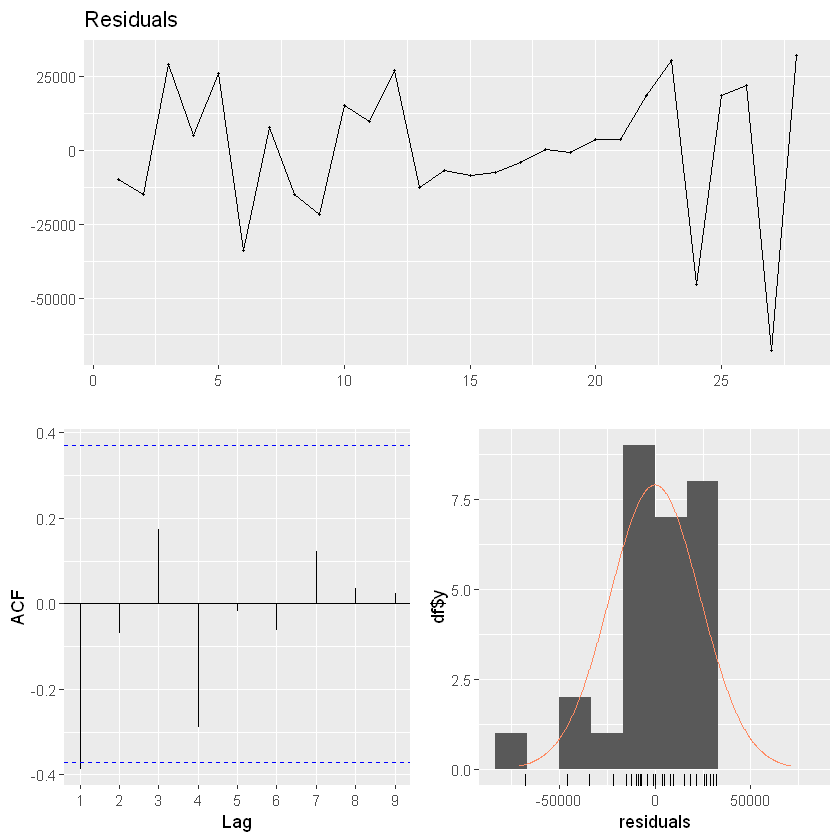

In [7]:
model2 <- lm(UGS~Trend+as.factor(Quart)+NLPG+PU+PG+NUGV+NDGV+GNPA, Data)
summary(model2)
checkresiduals(model2)

### I added all highly correlated dependent variables to my model and it can be seen that most of them become insignificant, 
### and residuals have high correlation in lag 1. Besides, residuals are not distributed normally. 


Call:
lm(formula = UGS ~ as.factor(Quart) + NUGV + NDGV, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-58064 -25662   3599  16405  71808 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.553e+06  1.254e+05  20.368 9.10e-16 ***
as.factor(Quart)2  1.257e+05  1.974e+04   6.367 2.09e-06 ***
as.factor(Quart)3  2.832e+05  1.985e+04  14.272 1.33e-12 ***
as.factor(Quart)4  1.147e+05  2.007e+04   5.715 9.51e-06 ***
NUGV              -7.768e-01  7.255e-02 -10.706 3.44e-10 ***
NDGV               7.849e+03  1.271e+03   6.176 3.24e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36880 on 22 degrees of freedom
Multiple R-squared:  0.9514,	Adjusted R-squared:  0.9404 
F-statistic: 86.18 on 5 and 22 DF,  p-value: 1.07e-13



	Breusch-Godfrey test for serial correlation of order up to 9

data:  Residuals
LM test = 10.637, df = 9, p-value = 0.3014


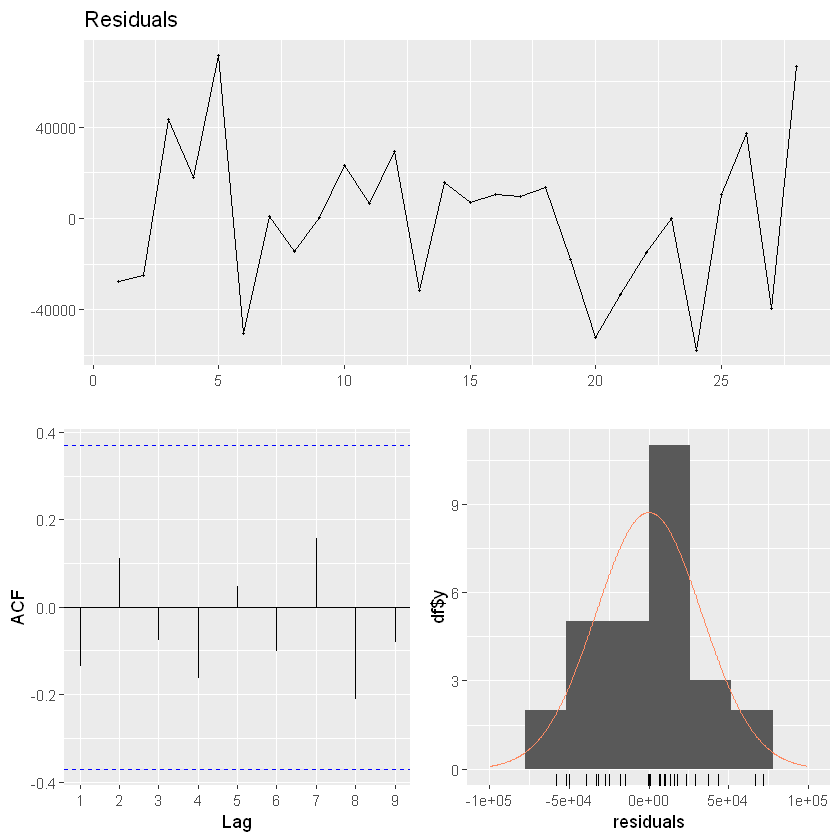

In [8]:
model3 <- lm(UGS~as.factor(Quart)+NUGV+NDGV, Data)
summary(model3)
checkresiduals(model3)

### When I remove all insignificant independent variables, my residual autocorrelation, and distribution improved significantly. 
### Besides, my adjusted R2 almost stayed same. In addition, I deleted trend variable because it has high correlation with both NUGV and NDGV; and cause a high residual autocorrelation in lag 1.


Call:
lm(formula = UGS ~ as.factor(Quart) + NUGV + NDGV + UGSlag5, 
    data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-53796 -19483   2226  21321  73666 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.479e+06  1.195e+05  20.738 1.82e-15 ***
as.factor(Quart)2  1.282e+05  1.814e+04   7.069 5.64e-07 ***
as.factor(Quart)3  2.886e+05  1.835e+04  15.727 4.30e-13 ***
as.factor(Quart)4  1.249e+05  1.894e+04   6.593 1.58e-06 ***
NUGV              -5.809e-01  1.089e-01  -5.333 2.74e-05 ***
NDGV               4.840e+03  1.764e+03   2.744   0.0122 *  
UGSlag5           -6.084e-02  2.678e-02  -2.272   0.0337 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33820 on 21 degrees of freedom
Multiple R-squared:  0.961,	Adjusted R-squared:  0.9499 
F-statistic: 86.26 on 6 and 21 DF,  p-value: 1.073e-13



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 13.024, df = 10, p-value = 0.2224


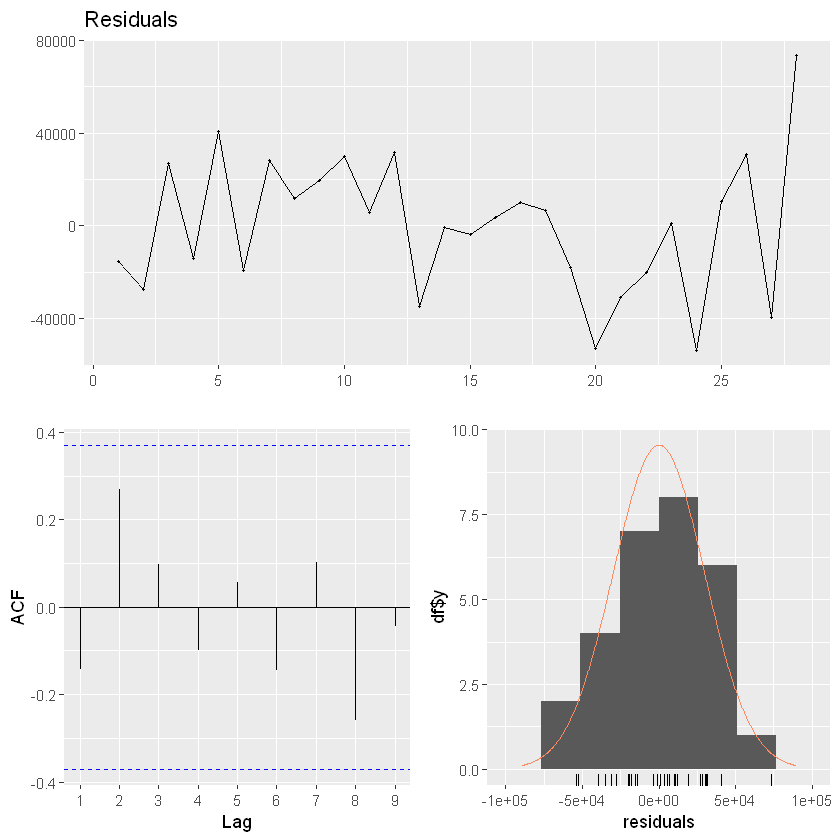

In [9]:
model4 <- lm(UGS~as.factor(Quart)+NUGV+NDGV+UGSlag5, Data)
summary(model4)
checkresiduals(model4)

### To increase my model performance, I added several lag values of UDS. Lag1 and lag5 kind a improve my model by reducing residual variance and increasing adjusted R2 and normality of residuals. As a result, I added UGSlag5 as a predictor.

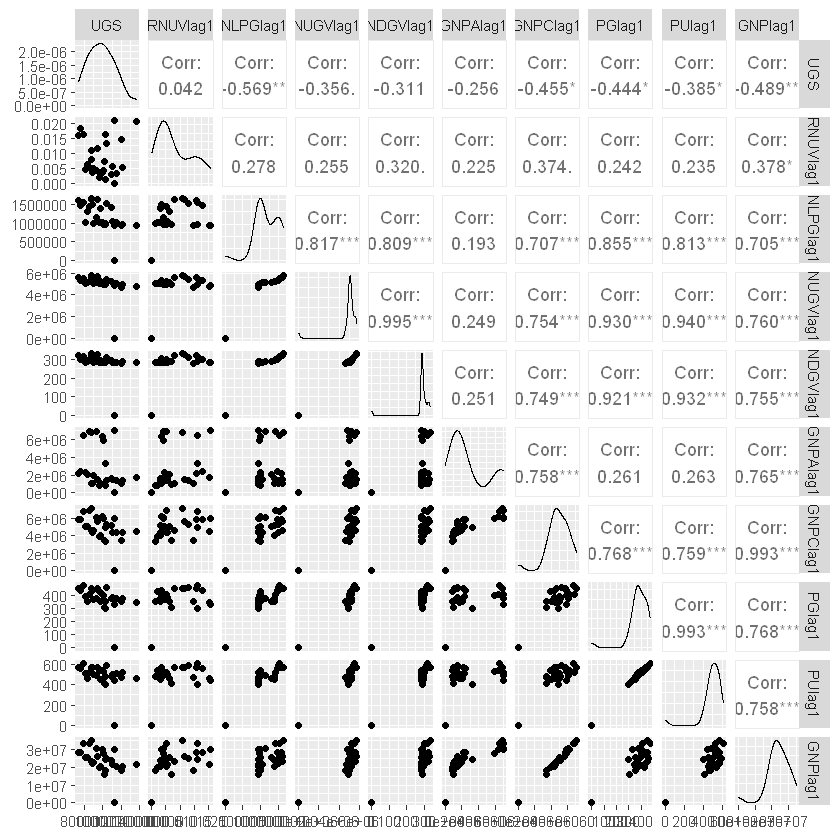

In [10]:
ggpairs(Data, columns = c(2,22:30))

### It looks like adding lag1 most of the dependent variables may increase the power of the model.


Call:
lm(formula = UGS ~ as.factor(Quart) + NUGV + NDGV + UGSlag1 + 
    UGSlag5 + NUGVlag1 + GNPClag1, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-52565 -13251   -715  11061  41904 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.748e+06  5.520e+05   6.790 2.33e-06 ***
as.factor(Quart)2 -2.483e+04  4.536e+04  -0.547 0.590850    
as.factor(Quart)3  2.774e+05  1.939e+04  14.306 2.84e-11 ***
as.factor(Quart)4  3.335e+05  6.224e+04   5.358 4.30e-05 ***
NUGV              -1.154e+00  2.410e-01  -4.787 0.000147 ***
NDGV               9.723e+03  2.327e+03   4.178 0.000565 ***
UGSlag1           -5.273e-01  1.961e-01  -2.688 0.015023 *  
UGSlag5           -1.037e-01  2.591e-02  -4.002 0.000837 ***
NUGVlag1           2.374e-01  6.868e-02   3.456 0.002817 ** 
GNPClag1          -8.250e-02  2.807e-02  -2.939 0.008778 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27680 on 18 degrees


	Breusch-Godfrey test for serial correlation of order up to 13

data:  Residuals
LM test = 23.251, df = 13, p-value = 0.03876


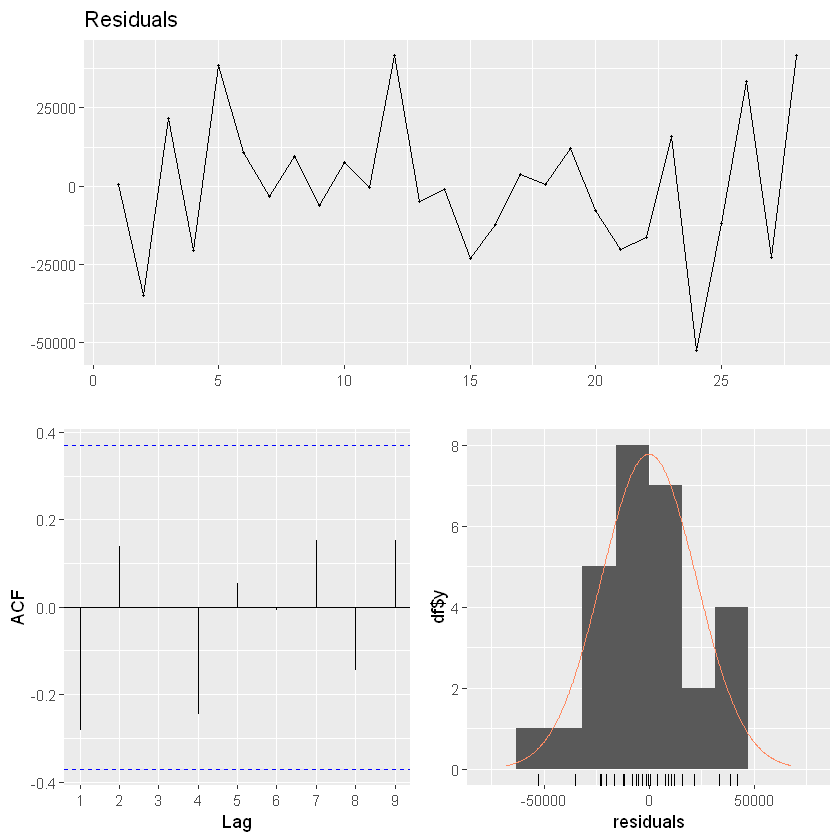

In [11]:
modelFinal <- lm(UGS~as.factor(Quart)+NUGV+NDGV+UGSlag1+UGSlag5+NUGVlag1+GNPClag1, Data)
summary(modelFinal)
checkresiduals(modelFinal)

### Adding some of the lagged independent variables increased model power significantly. I tried several combinations to check that if this improvement becomes randomly. However, each lagged variable improve the model significantly, so my final model is set. 

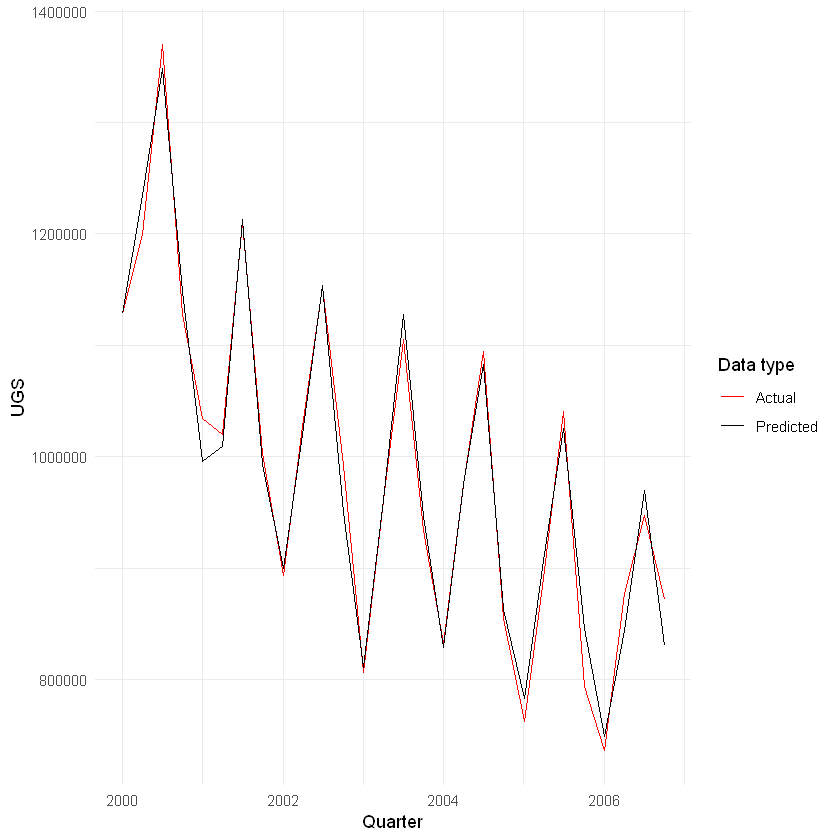

In [12]:
ggplot(Data,aes(x=Quarter))+
  geom_line(aes(y=UGS,color='Actual'))+
  geom_line(aes(y=c(fitted(modelFinal)),color='Predicted'))+
  scale_color_manual(name = "Data type", values = c("Actual" = "red", "Predicted" = "Black"))+
  theme_minimal()
 

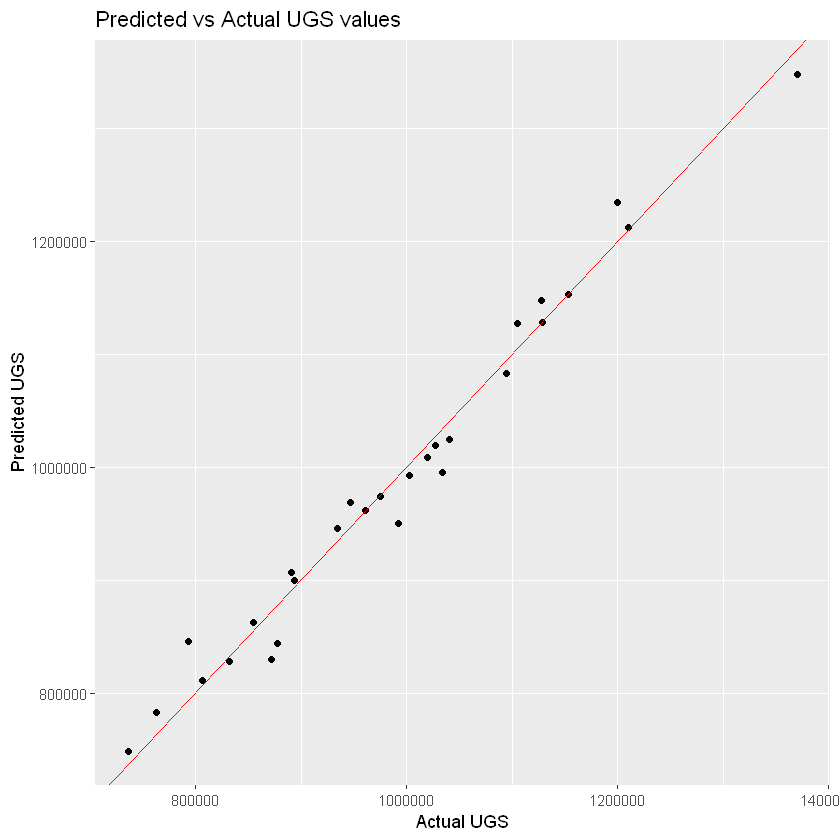

In [13]:
ggplot(Data)+
  geom_point(aes(x=UGS,y=fitted(modelFinal)))+
  geom_abline(slope=1,color="red")+
  labs(x="Actual UGS",y="Predicted UGS", title="Predicted vs Actual UGS values")

## As it can be seen in the above 2 plots, my fitted model matches successfully with the data. So, my model is ready: all variables are significant, residuals have no pattern and high autocorrelation, residuals are almost normally distributed.



In [14]:
Data=read.csv("C:/Users/gabri/Desktop/IE360/HW2/IE360_Spring22_HW2_data.csv")
colnames(Data) <- c('Quarter','UGS','RNUV','NLPG','PU','PG','NUGV','NDGV','GNPA','GNPC','GNP')
Data$Quarter=as.Date(as.yearqtr(Data$Quarter, format = "%Y_Q%q"))
Data$UGS=as.numeric(gsub(" ","",as.character(Data$UGS),fixed=TRUE))
Data$RNUV=as.numeric(gsub(" ","",as.character(Data$RNUV),fixed=TRUE))
Data$NLPG=as.numeric(gsub(" ","",as.character(Data$NLPG),fixed=TRUE))
Data$NUGV=as.numeric(gsub(" ","",as.character(Data$NUGV),fixed=TRUE))
Data$GNPA=as.numeric(gsub(" ","",as.character(Data$GNPA),fixed=TRUE))
Data$GNPC=as.numeric(gsub(" ","",as.character(Data$GNPC),fixed=TRUE))
Data$GNP=as.numeric(gsub(" ","",as.character(Data$GNP),fixed=TRUE))
Data$Trend=seq(0,31,by=1)
Data$Quart=seq(1,4,by=1)
Data <- Data %>%
  mutate(UGSlag1=lag(UGS,1),
         UGSlag5=lag(UGS,5),
         NUGVlag1=lag(NUGV,1),
         GNPClag1=lag(GNPC,1))
 
 

In [15]:
Data[29,2]=predict(modelFinal,newdata=Data[29,])
Data$UGSlag1[30]=Data[29,2]
Data[30,2]=predict(modelFinal,newdata=Data[30,])
Data$UGSlag1[31]=Data[30,2]
Data[31,2]=predict(modelFinal,newdata=Data[31,])
Data$UGSlag1[32]=Data[31,2]
Data[32,2]=predict(modelFinal,newdata=Data[32,])
Data

Quarter,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,Trend,Quart,UGSlag1,UGSlag5,NUGVlag1,GNPClag1
2000-01-01,1128971.0,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,0,1,NA,NA,NA,NA
2000-04-01,1199569.0,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,1,2,1128971.0,NA,4647500,3483132
2000-07-01,1370167.0,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,2,3,1199569.0,NA,4742876,4525451
2000-10-01,1127548.0,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,3,4,1370167.0,NA,4840931,5915204
2001-01-01,1033918.0,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,4,1,1127548.0,NA,4919685,4929778
2001-04-01,1019754.0,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,5,2,1033918.0,1128971,4954754,3418387
2001-07-01,1209916.0,0.0041,967500,530.37,398.71,5000446,287.5452,5890424,5925547,28017963,6,3,1019754.0,1199569,4980204,4359831
2001-10-01,1002789.0,0.0048,990000,496.35,370.70,5024693,286.9786,1940854,4559190,22656812,7,4,1209916.0,1370167,5000446,5925547
2002-01-01,893722.0,0.0012,1000000,479.52,352.72,5030810,286.3783,832953,3374849,18393446,8,1,1002789.0,1127548,5024693,4559190
2002-04-01,1027252.0,0.0032,1001000,506.36,373.44,5046960,286.0471,1419764,4363782,20382635,9,2,893722.0,1033918,5030810,3374849


## My Predictions:
### 2007-01 - 642680.3
### 2007-04 - 831318.4
### 2007-07 - 926793.9	
### 2007-10 - 776401.4

# Conclusion

### First thing I did was checking the data if it is stationary or not. It can be clearly seen that data wasn't stationary: has a decreasing mean with constant variance. Since variance was constant, I didn't need to do any transformation. 
### After that, I made time series analysis, which was kind a successful. However, since we have highly correlated independent variables, I added them to see if they improve the model. Most of them improved the model, however, since they are highly correlated between themselves, adding 2 were enough at the first place. In addition, some of these variables were highly correlated with trend, so I removed the trend(independent variables were improving model better).
### Then I analyzed the effects of both lagged UGS and lagged independent variables on the model. I found out that both lagged UGS values and some of the lagged independent variables could improve model. In the light of these informations, I set my final model and made predictions using it. 